In [1]:
from sympy import *
init_printing(use_latex=True)
from IPython.display import display

## 1.
(a)

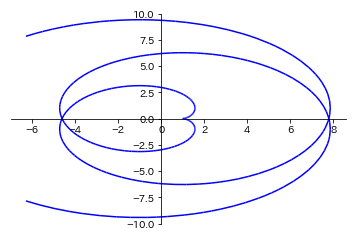

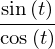

In [2]:
%matplotlib inline
x,y,t = symbols('x y t')
x = cos(t) + t*sin(t)
y = sin(t) - t*cos(t)
p = plotting.plot_parametric(x, y, autoscale=True, show=False, range=(t, -2*pi, 2*pi))
p[0].line_color = 'blue'
p.show()

# dy/dx = dy/dt / dx/dt

dydt = diff(y,t)
dxdt = diff(x,t)
dydx = dydt / dxdt
display(dydx)

(b)

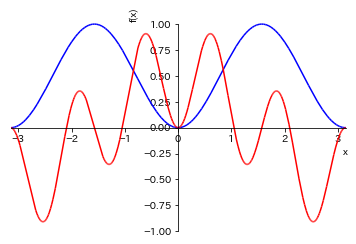

In [3]:
x = symbols('x')
f1_1 = sin(x) * sin(x)
f2_3 = sin(2*x) * sin(3*x)
p = plot(f1_1, f2_3, show=False)
p[0].line_color = "blue"
p[1].line_color = "red"
p.xlim=([float(-pi),float(pi)])
p.show()
display(integrate(f1_1, (x,-pi,pi)))
display(integrate(f2_3, (x,-pi,pi)))

#### pi (n=m)
\[-pi,0\], \[0,pi\] でそれぞれ$\frac{\pi}{2}$足している
#### 0 (n≠m)
(右側)\[0,1(らへん)\]と\[2(らへん),pi\], \[1(らへん), 1.5(らへん)\]と\[1.5(らへん),2(らへん)\] が、それぞれ打ち消し合っている。左側も同様

### 同時対角化

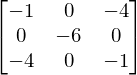

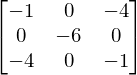

In [4]:
import numpy as np
A = Matrix([[1,0,-2],[0,2,0],[-2,0,1]])
B = Matrix([[3,0,2],[0,-3,0],[2,0,3]])
display(A*B)
display(B*A)

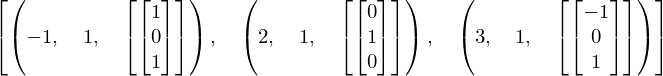

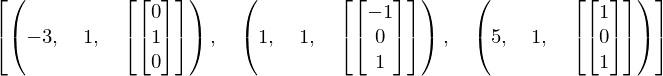

In [5]:
display(A.eigenvects())
display(B.eigenvects())

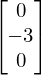

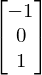

In [6]:
x1 = Matrix([1,0,1])
x2 = Matrix([0,1,0])
x3 = Matrix([-1,0,1])
Bx1 = B*x1
Bx2 = B*x2
Bx3 = B*x3
display(Bx1) # 5 * x1
display(Bx2) # -3 * x2
display(Bx3) # 1 * x3

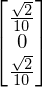

In [7]:
p1 = x1/sqrt(50)
p2 = x2/sqrt(9)
p3 = x3/sqrt(2)
display(p1)


In [8]:
P = np.column_stack((p1,p2,p3))
pprint(P)

[[sqrt(2)/10 0 -sqrt(2)/2]
         [0 1/3 0]        
 [sqrt(2)/10 0 sqrt(2)/2]]


上の行列Pが、A,Bを同時に対角化する

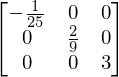

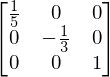

In [9]:
display(P.T*A*P)
display(P.T*B*P)

### 2次形式

In [10]:
f = lambda x1,x2,x3 : 3*x1**2 + 2*x2**2 + 4*x3**2 + 4*x1*x2 + 4*x1*x3
A,x,P = symbols('A x P')
x1,x2,x3 = symbols('x1 x2 x3')
y1,y2,y3 = symbols('y1 y2 y3')
P = Matrix([
    [-Rational(2,3), -Rational(1,3), Rational(2,3)],
    [Rational(2,3), -Rational(2,3), Rational(1,3)],
    [Rational(1,3), Rational(2,3), Rational(2,3)]
    ])
A = Matrix([[3,2,2],[2,2,0],[2,0,4]]) # (i,j)成分が、xi*xjの係数に対応している
x = Matrix([x1,x2,x3])
y = Matrix([y1,y2,y3])
display(y.T * P.T * A * P * y)

3.a 

(i)

In [11]:
a,b,c = symbols('a b c')
f1 = a + b + c - 1
f2 = a*b + b*c + c*a + 2
f3 = a*b*c + 1

a1_1 = expand(f1**2) # まずはa+b+c=1を2乗
display(a1_1)
a1_2 = a1_1 - 2*f2 # 2*f2で打ち消す
display(a1_2)
a1_3 = a1_2 + 2*f1 # 2*f1で打ち消す
display(a1_3) 
solve(a1_3, a**2+b**2+c**2)# ア

$\frac{1}{a} + \frac{1}{b} + \frac{1}{c}$

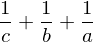

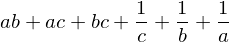

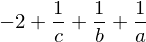

In [12]:
solve_me = 1/a + 1/b + 1/c
display(solve_me)

a1_4 = expand(f3*solve_me) # a*b*c=-1をかける
display(a1_4)
a1_5 = a1_4 - f2 # ab+ac+bc = -2を引く
display(a1_5)

solve(a1_5, solve_me) # イ

$\frac{1}{a^2} + \frac{1}{b^2} + \frac{1}{c^2}$

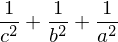

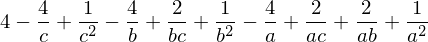

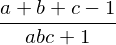

In [13]:
solve_me = 1/a**2 + 1/b**2 + 1/c**2
display(solve_me)

a1_6 = expand(a1_5**2) # 2乗する
display(a1_6)
a1_7 = f1/f3
display(a1_7)